/usr/bin/xdg-open: 870: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'simple_diagram.png'


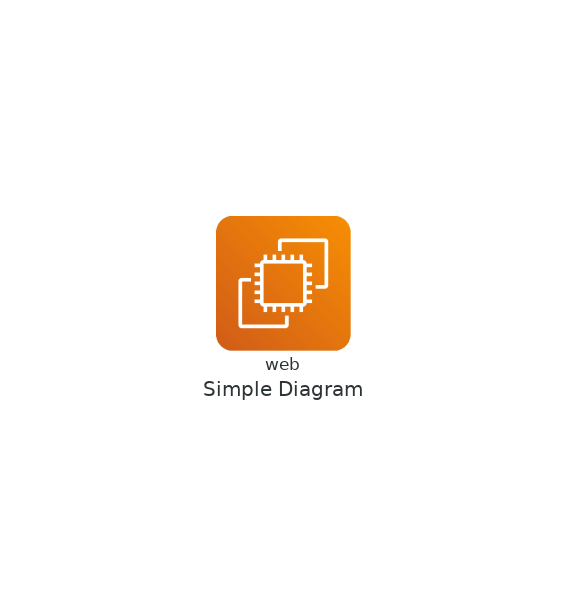

In [1]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram") as diag:
    EC2("web")
diag

In [3]:
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

/usr/bin/xdg-open: 870: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'grouped_workers.png'


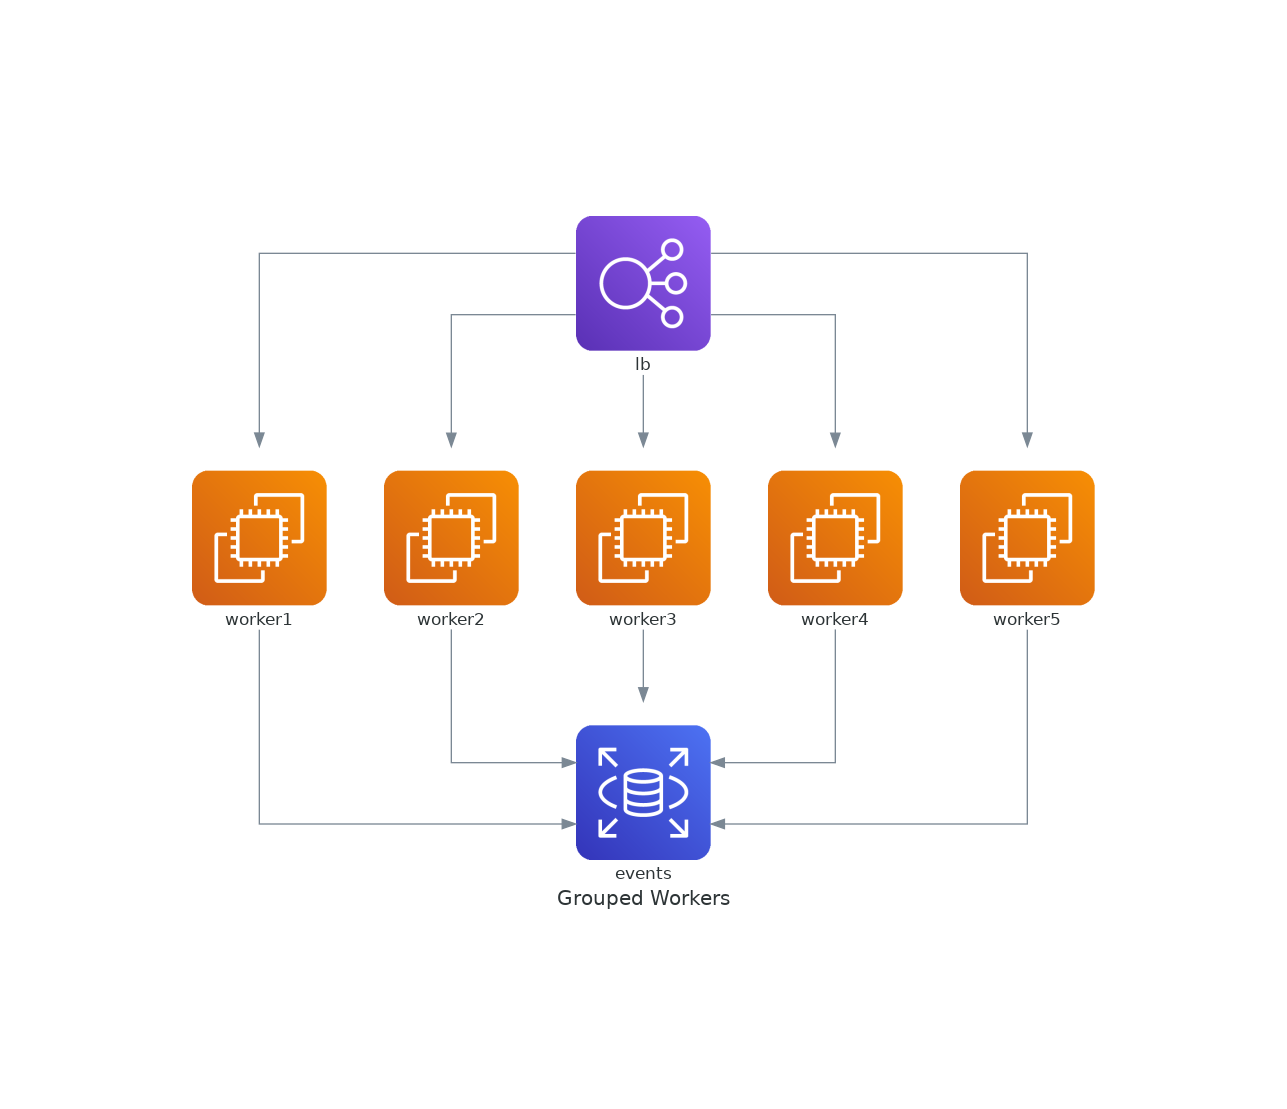

In [7]:
with Diagram("Grouped Workers", direction="TB") as diag:
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")
diag

In [10]:
# from diagrams import *
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

In [12]:
with Diagram("Message Collecting"):
    pubsub = PubSub("pubsub")

    with Cluster("Source of Data"):
        [IotCore("core1"),
         IotCore("core2"),
         IotCore("core3")] >> pubsub

    with Cluster("Targets"):
        with Cluster("Data Flow"):
            flow = Dataflow("data flow")

        with Cluster("Data Lake"):
            flow >> [BigQuery("bq"),
                     GCS("storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("engine") >> BigTable("bigtable")

            with Cluster("Serverless"):
                flow >> Functions("func") >> AppEngine("appengine")

    pubsub >> flow

/usr/bin/xdg-open: 870: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'message_collecting.png'


In [151]:
from diagrams import Cluster, Diagram, Edge

In [137]:
from diagrams.gcp.storage import GCS, Storage
from diagrams.onprem.container import Docker
from diagrams.programming.language import Python
from diagrams.onprem.vcs import Github
from diagrams.gcp.compute import Run
from diagrams.onprem.client import User
from diagrams.gcp.devtools import Build
from diagrams.onprem.workflow import Airflow
from diagrams.onprem.client import Users

/usr/bin/xdg-open: 870: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'decision_intelligence_application.png'


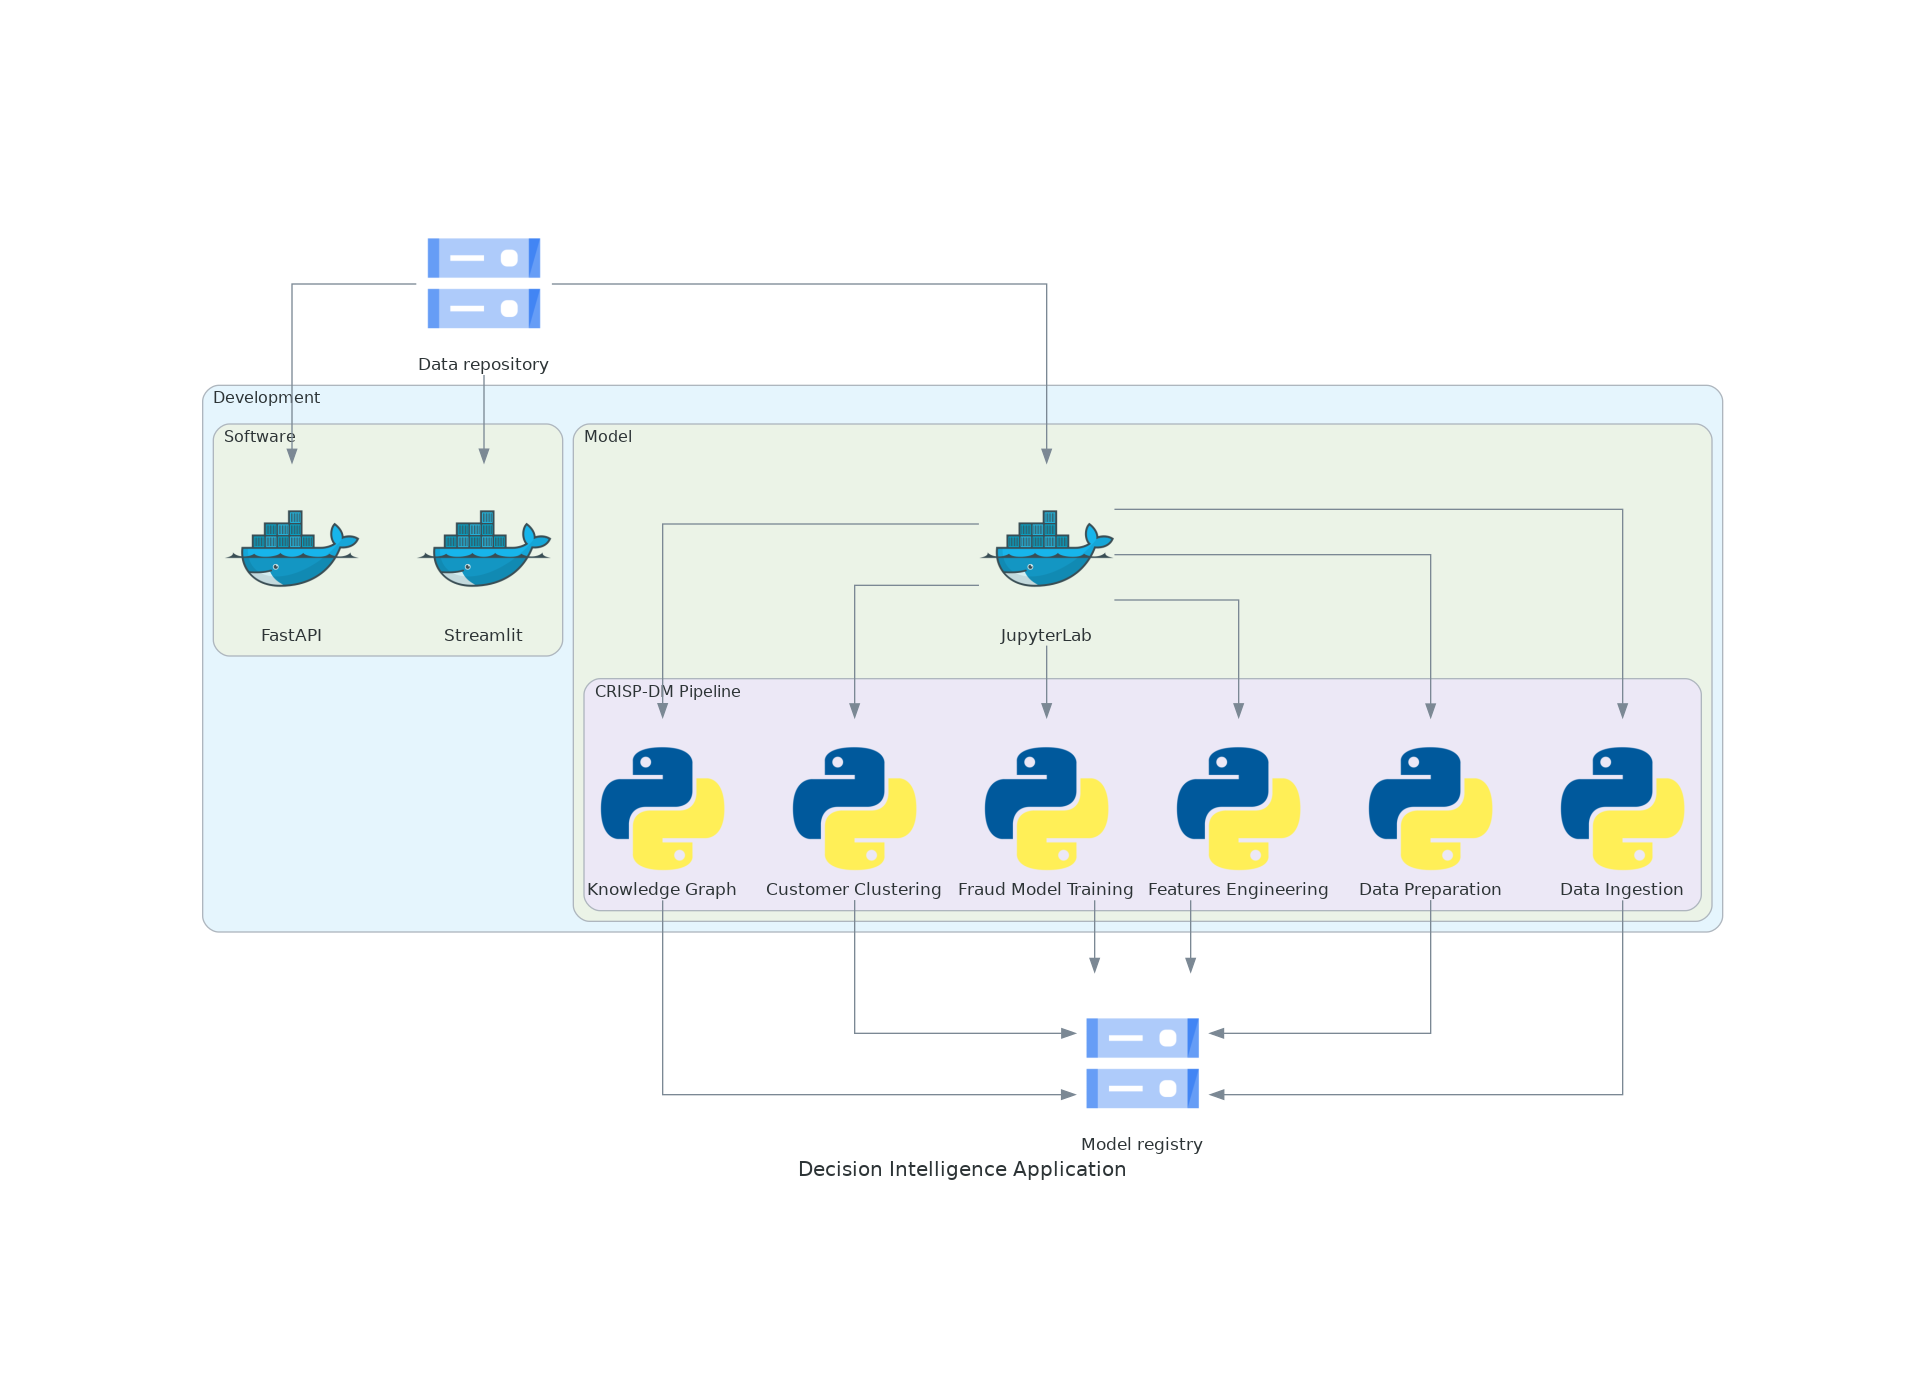

In [44]:
with Diagram("Decision Intelligence Application",direction="TB") as df:
    storage = Storage("Data repository")
    
    with Cluster("Development"):
    
        with Cluster("Model"):
            container = Docker("JupyterLab")

            with Cluster("CRISP-DM Pipeline"):
                pipe = [Python("Data Ingestion"),
                        Python("Data Preparation"),
                        Python("Features Engineering"),
                        Python("Fraud Model Training"),
                        Python("Customer Clustering"),
                        Python("Knowledge Graph")]

        with Cluster("Software"):
                storage >> [Docker("Streamlit"),
                              Docker("FastAPI")]


        storage >> container  >> pipe
        
    model = Storage("Model registry")

    pipe >> model

df

aggiungo github e prod

/usr/bin/xdg-open: 870: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'decision_intelligence_application.png'


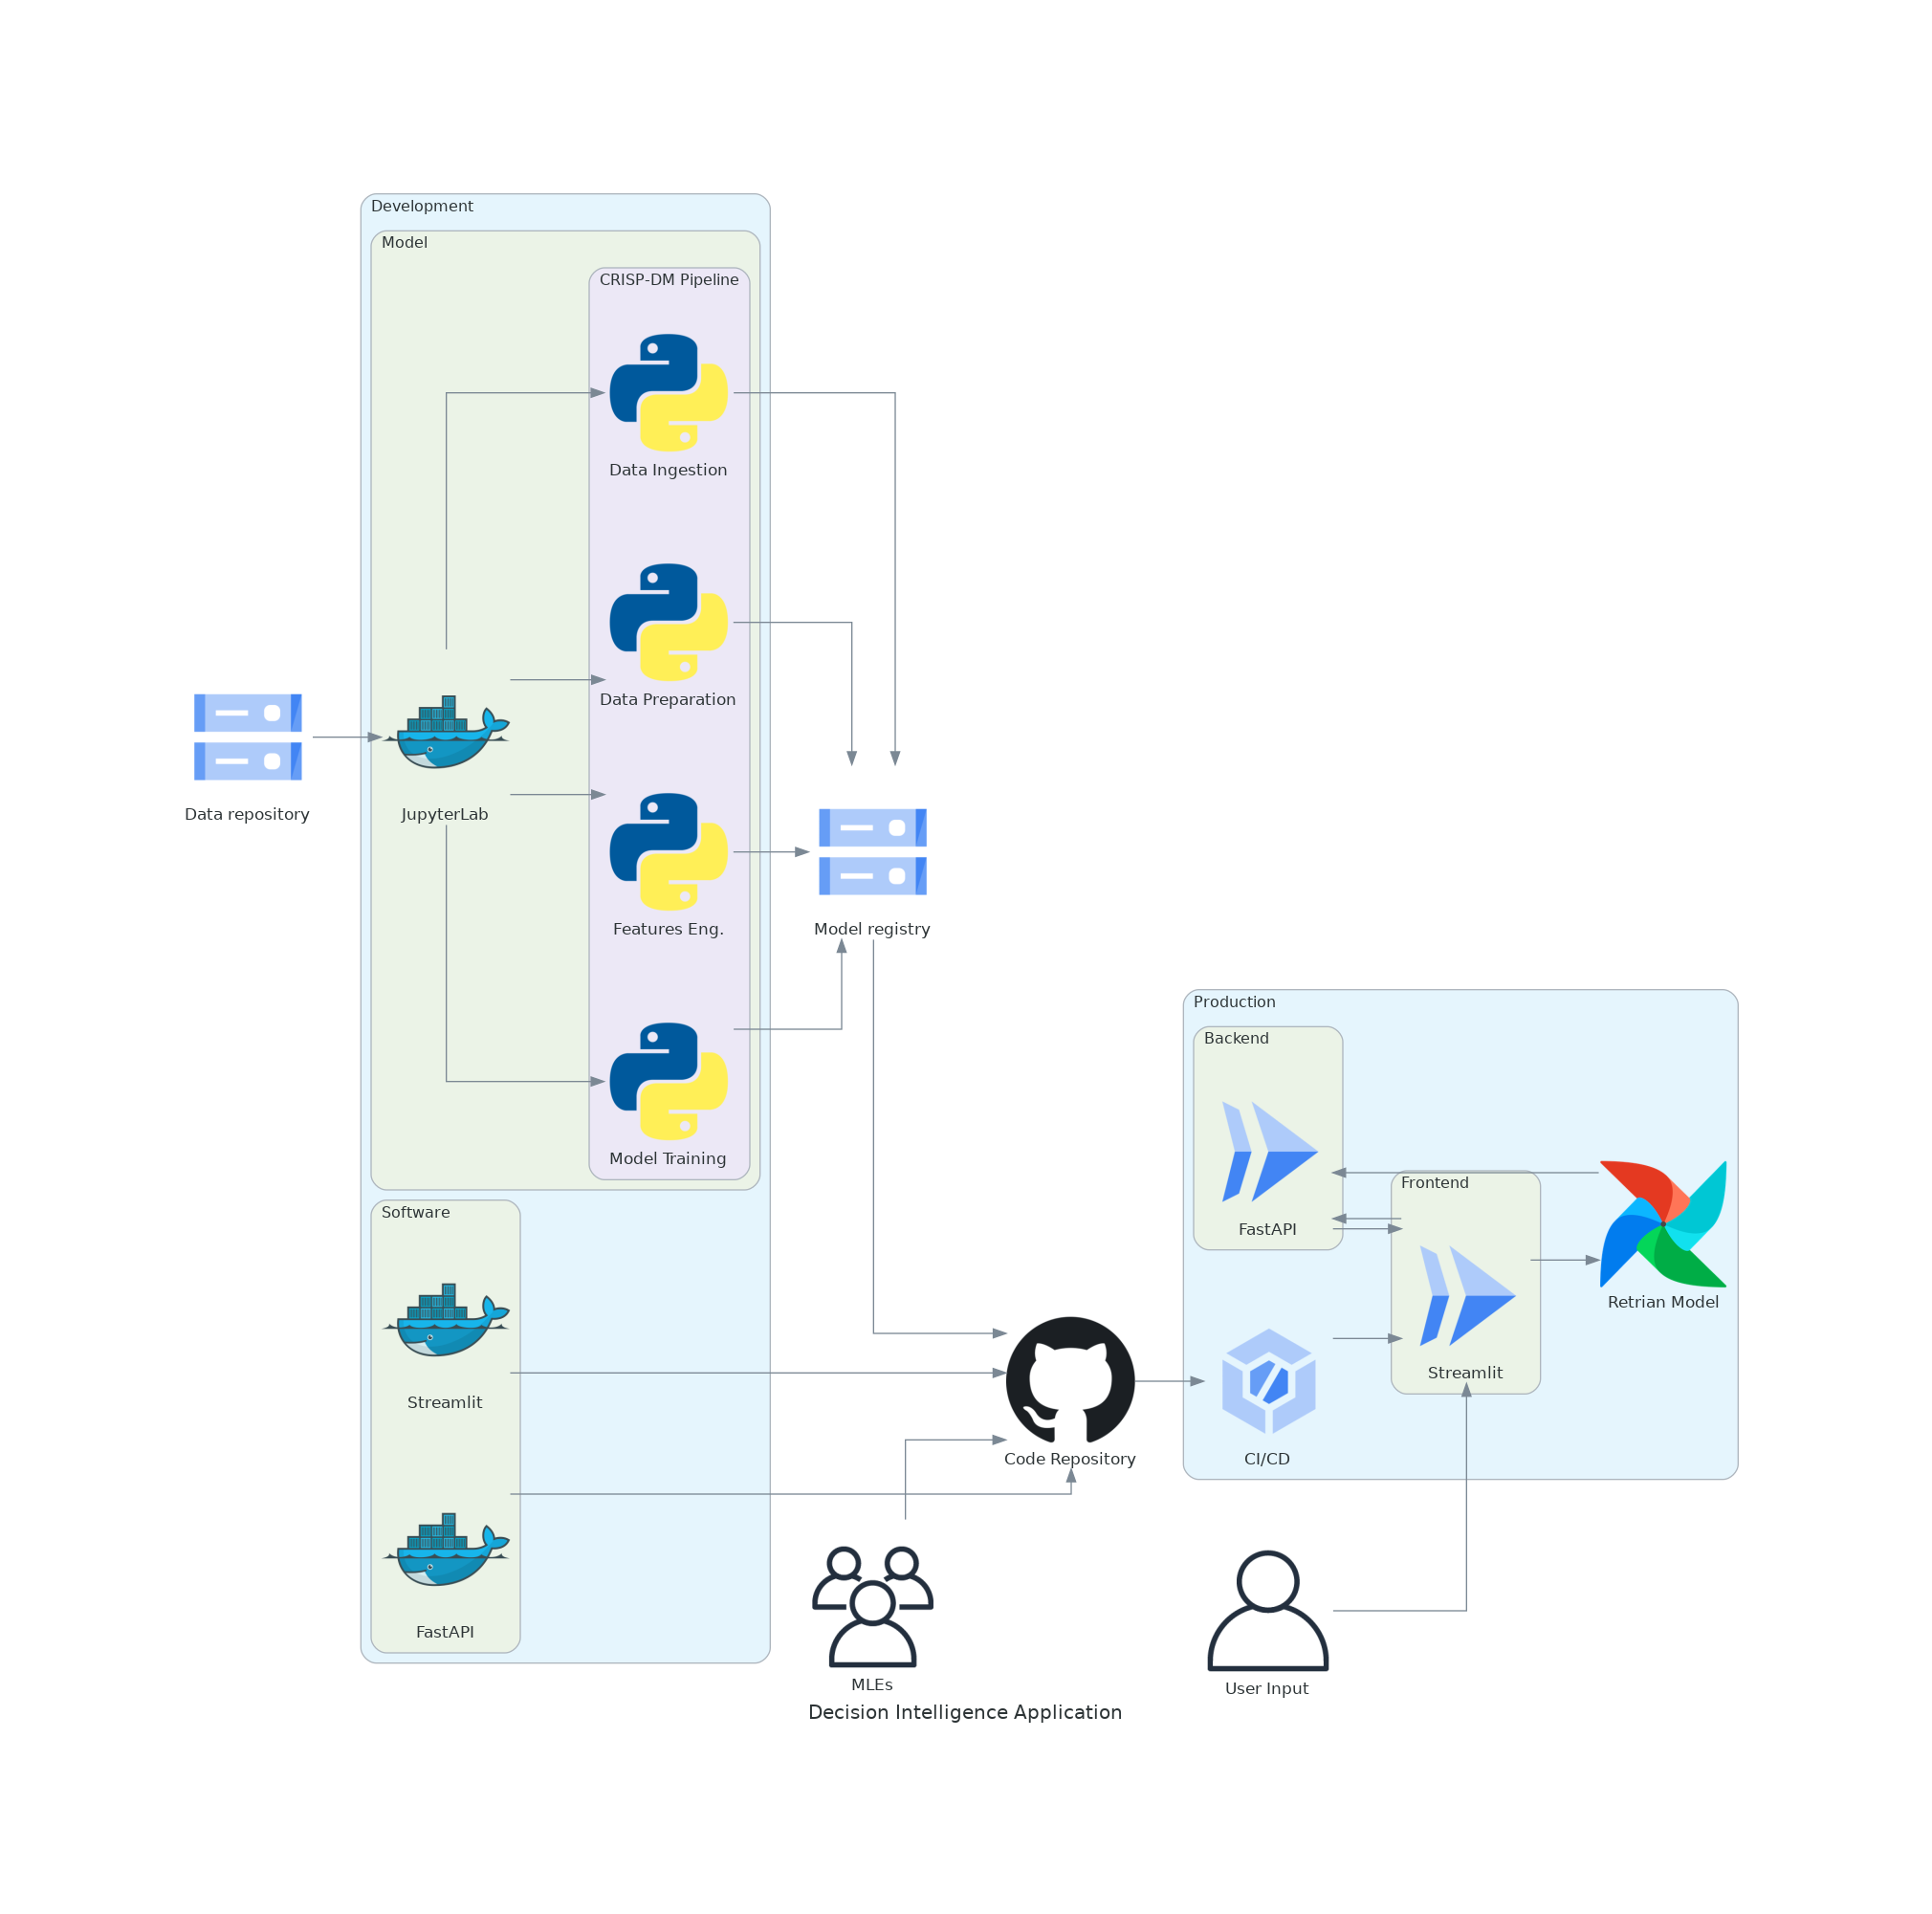

In [150]:
with Diagram("Decision Intelligence Application",direction="LR") as df:
    storage = Storage("Data repository")
    
    with Cluster("Development"):
        with Cluster("Model"):
            jupyter = Docker("JupyterLab")

            with Cluster("CRISP-DM Pipeline"):
                pipe = [Python("Data Ingestion"),
                        Python("Data Preparation"),
                        Python("Features Eng."),
                        Python("Model Training")]

        with Cluster("Software"):
            str_fast = [Docker("Streamlit"),
                          Docker("FastAPI")]
    
    git = Github("Code Repository")
    
    model = Storage("Model registry")
    
    storage >> jupyter >> pipe >> model >> git
    str_fast >> git

    
    with Cluster("Production"):
        with Cluster("Backend"):
            back = Run("FastAPI")
            
        with Cluster("Frontend"):
            front = Run("Streamlit")
        back >> front
        back << front
        
        cicd = Build("CI/CD")
    
        retrain = Airflow("Retrian Model")
    
    mle = Users("MLEs")
    user = User("User Input")

    mle >> git >> cicd >> front
    user >> front >> retrain >> back
    
df

questo qua sotto è quello ufficiale

/usr/bin/xdg-open: 870: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 870: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'decision_intelligence_application.png'


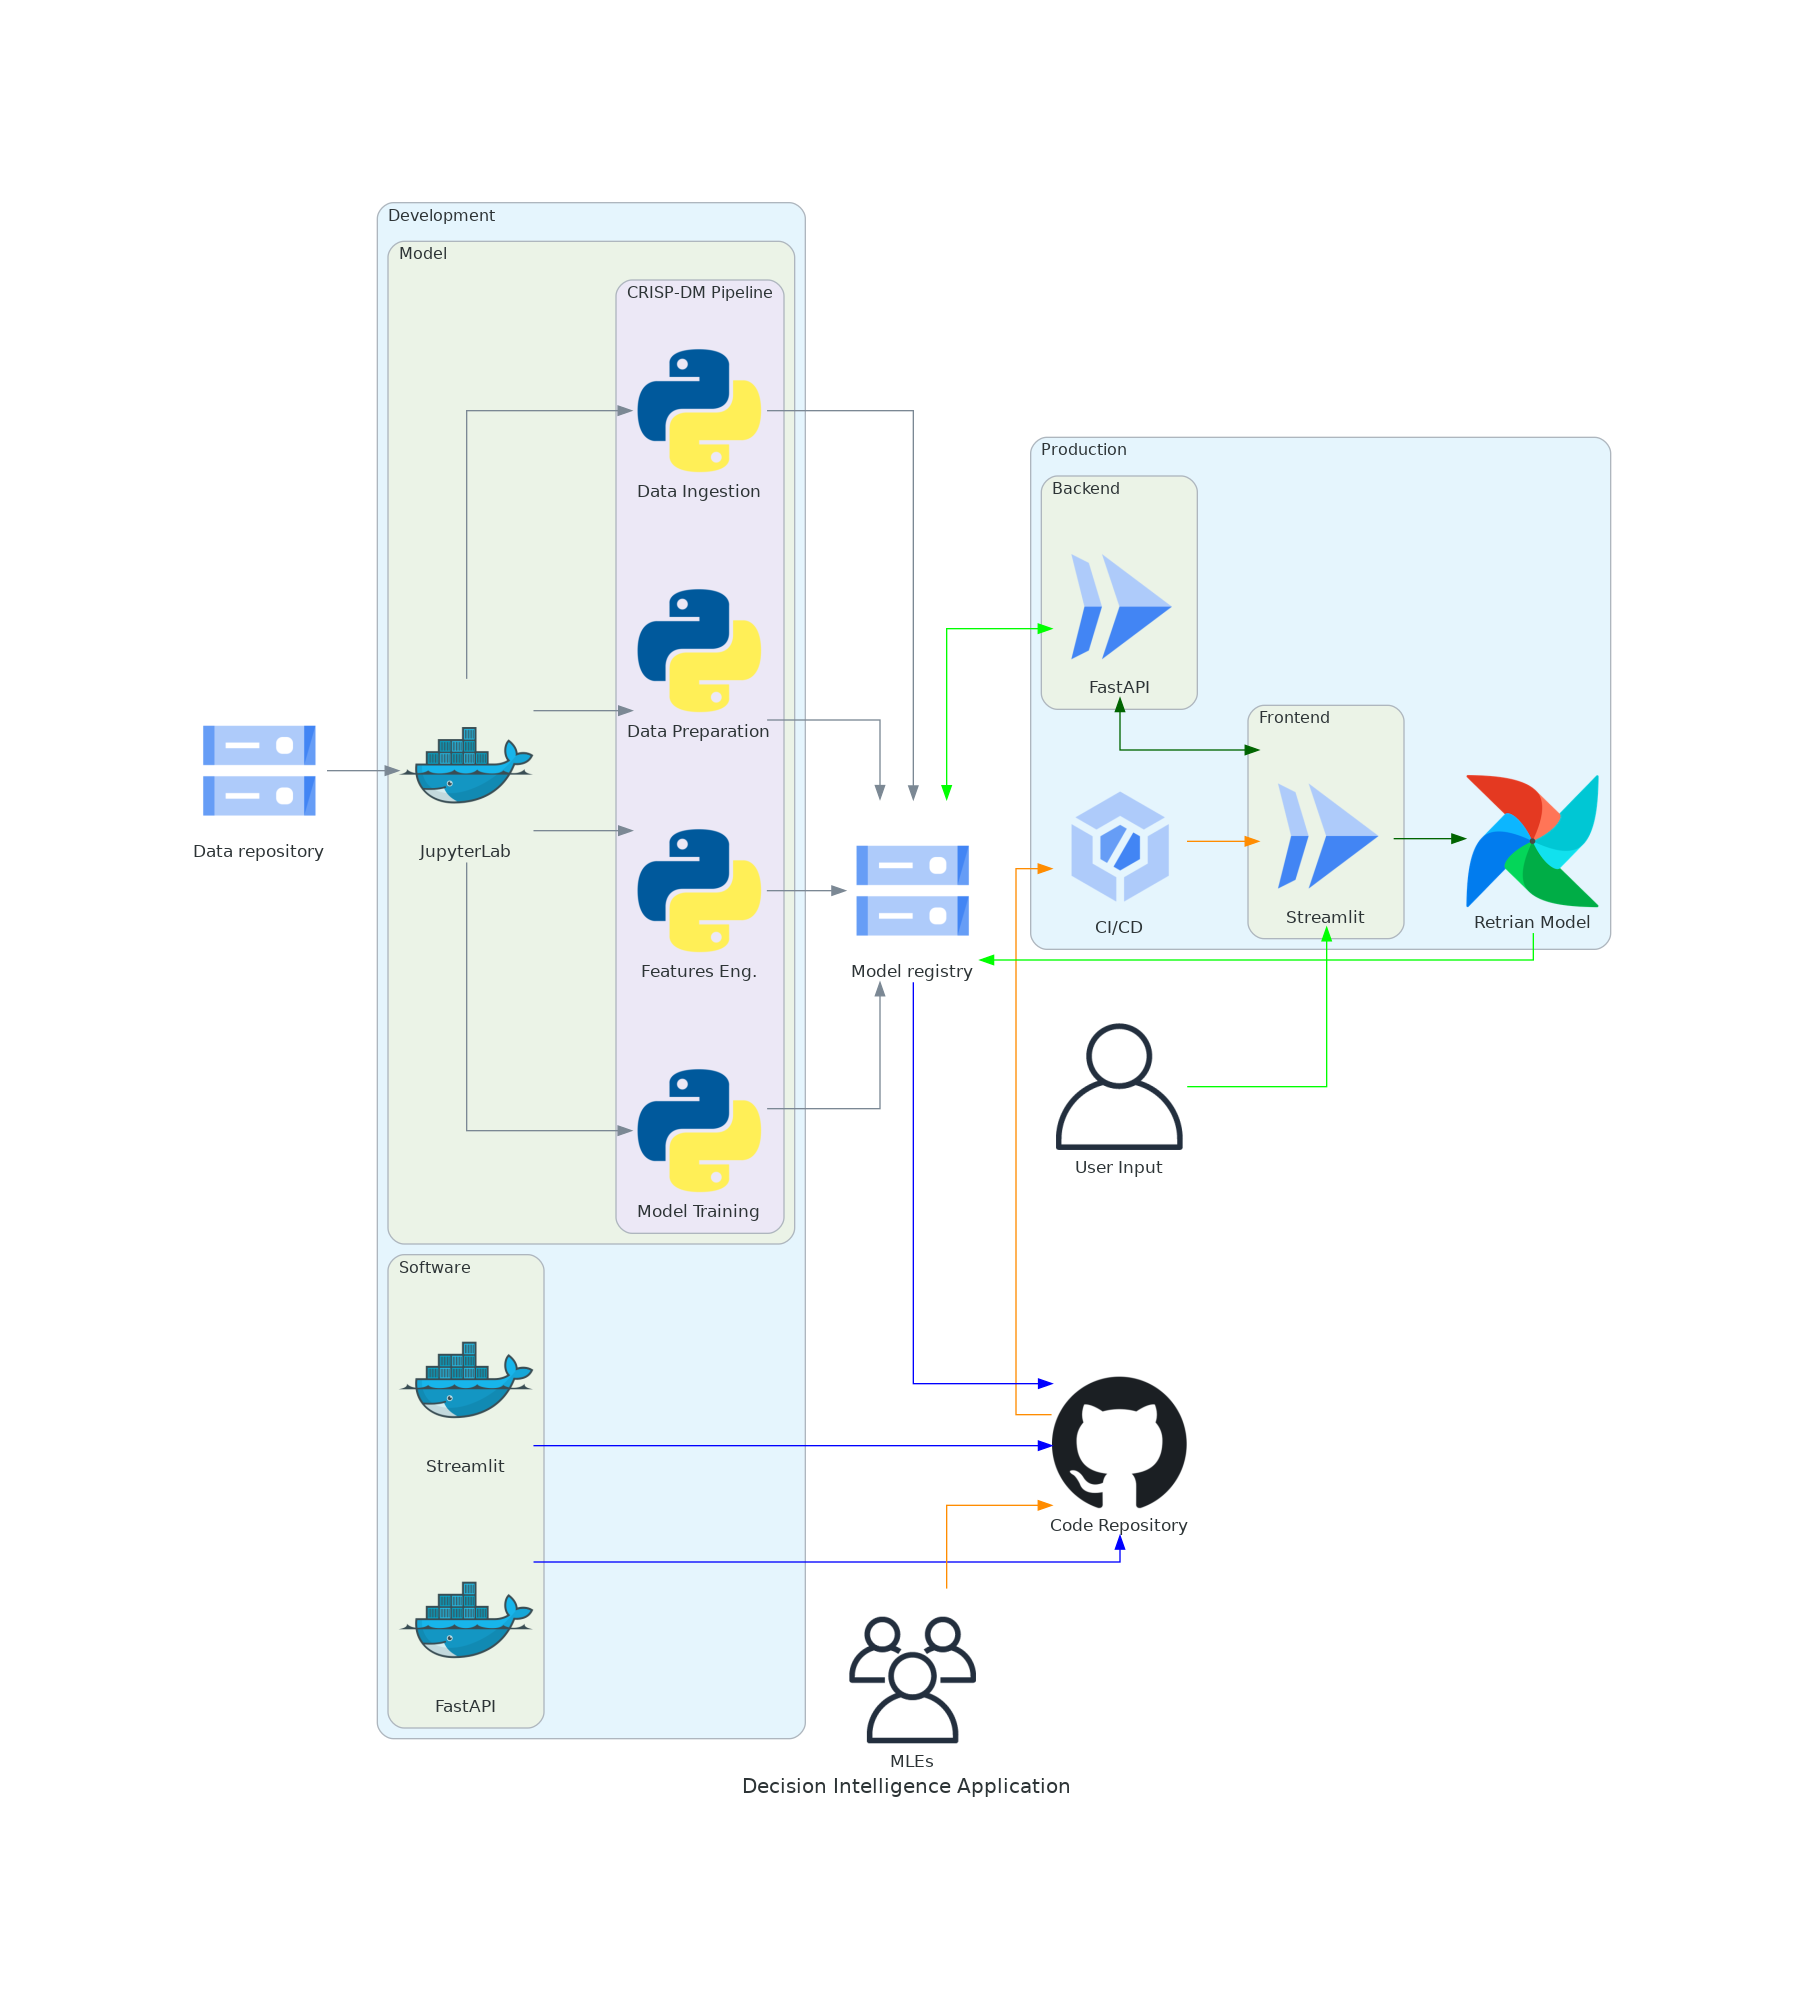

In [183]:
with Diagram("Decision Intelligence Application",direction="LR") as df:
    storage = Storage("Data repository")
    
    with Cluster("Development"):
        with Cluster("Model"):
            jupyter = Docker("JupyterLab")

            with Cluster("CRISP-DM Pipeline"):
                pipe = [Python("Data Ingestion"),
                        Python("Data Preparation"),
                        Python("Features Eng."),
                        Python("Model Training")]

        with Cluster("Software"):
            str_fast = [Docker("Streamlit"),
                          Docker("FastAPI")]
    
    git = Github("Code Repository")
    
    model = Storage("Model registry")
    
    storage >> jupyter >> pipe >> model >> Edge(color="blue") >> git
    str_fast >> Edge(color="blue") >> git

    
    with Cluster("Production"):
        with Cluster("Backend"):
            back = Run("FastAPI")
            
        with Cluster("Frontend"):
            front = Run("Streamlit")
        
        back >> Edge(color="darkgreen") << front >> Edge(color="green")
        
        cicd = Build("CI/CD")
    
        retrain = Airflow("Retrian Model")
    
    mle = Users("MLEs")
    user = User("User Input")
    
    model >> Edge(color="green") << back >> Edge(color="green")
    
    mle >> Edge(color="darkorange") >> git >> Edge(color="darkorange") >> cicd >> Edge(color="darkorange") >> front
    user >> Edge(color="green") >> front >> Edge(color="darkgreen") >> retrain >> Edge(color="green") >> model
    
df